## PCA (Dimensionality Reduction) + K-Means: Ookla vs Towers

In [268]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pylab as pl
import seaborn as sns
from sklearn import datasets
%config InlineBackend.figure_format='retina'
%matplotlib inline

### Load cleaned data

In [269]:
data = pd.read_csv("final data for clustering.csv").set_index('Region')
data

,Tests (Q1-2019),Devices (Q1-2019),Ave Latency(ms) (Q1-2019),Ave Download(Mbps) (Q1-2019),Ave Upload(Mbps) (Q1-2019),Tests (Q1-2020),Devices (Q1-2020),Ave Latency(ms) (Q1-2020),Ave Download(Mbps) (Q1-2020),Ave Upload(Mbps) (Q1-2020),...,Ave Download(Mbps) (Q4-2020),Ave Upload(Mbps) (Q4-2020),Smart 2019,Smart 2020,Globe 2019,Globe 2020,Total Population as of May 2020,Level of Urbanization (%),Daily Minimum Wage (Php),Surface Area (km^2)
Region,,,,,,,,,,,,,,,,,,,,,
ARMM,1295,493,78.089362,9.425894,5.965306,3165,917,60.174263,8.484839,6.126777,...,7.108765,5.169553,82,88,190,258,4404288,13.7,325,12535.79
CAR,3859,2048,68.593258,9.801103,5.639625,6241,2983,51.034591,10.762159,6.035094,...,8.091913,4.459382,493,545,253,337,1797660,26.3,350,19422.03
NCR,114782,58942,45.545124,18.043558,7.663277,186271,85129,32.774387,19.723741,6.605460,...,28.887553,6.562790,6270,6973,2561,3746,13484462,100.0,537,619.57
Region I,7871,4058,60.132345,12.059348,6.199840,13920,6130,42.431923,11.884861,6.198092,...,12.259604,4.932170,1287,1420,691,1100,5301139,12.7,340,13012.60
Region II,4023,2062,65.253389,11.184127,5.790260,6598,3216,42.239628,13.033006,6.630197,...,10.890773,5.177189,699,822,480,773,3685744,11.6,370,28228.83
Region III,30432,16175,57.798584,13.126023,6.716969,57651,24935,45.033558,12.656666,6.277600,...,14.219295,5.146316,2914,3588,1094,1506,12422172,51.6,420,22014.63
Region IV-A,45180,22877,55.917223,12.265577,6.333098,90533,36087,44.157556,12.793386,5.971780,...,14.223361,4.909055,3566,4277,1882,2496,16195042,59.7,400,16873.31
Region IV-B,2833,1174,64.475046,10.792100,5.329701,5195,1949,57.045894,12.005827,7.411930,...,10.162448,5.668466,494,606,665,767,3228558,22.3,320,29620.90
Region IX,2527,1224,69.071560,12.498095,6.725895,4825,2175,46.782178,13.000708,7.308969,...,10.746596,6.254332,623,714,378,521,3875576,33.9,316,17056.73


### Unlike the previous PCA + Kmeans for other attributes, we will use PCA on the whole Ookla Data vs Number of Towers, The number of columns for towers is not singular. Thus would also need dimension reduction.

In [270]:
ootowers = data.iloc[:,:-4]
ootowers

,Tests (Q1-2019),Devices (Q1-2019),Ave Latency(ms) (Q1-2019),Ave Download(Mbps) (Q1-2019),Ave Upload(Mbps) (Q1-2019),Tests (Q1-2020),Devices (Q1-2020),Ave Latency(ms) (Q1-2020),Ave Download(Mbps) (Q1-2020),Ave Upload(Mbps) (Q1-2020),...,Ave Upload(Mbps) (Q4-2019),Tests (Q4-2020),Devices (Q4-2020),Ave Latency(ms) (Q4-2020),Ave Download(Mbps) (Q4-2020),Ave Upload(Mbps) (Q4-2020),Smart 2019,Smart 2020,Globe 2019,Globe 2020
Region,,,,,,,,,,,,,,,,,,,,,
ARMM,1295,493,78.089362,9.425894,5.965306,3165,917,60.174263,8.484839,6.126777,...,6.076411,7692,2318,57.160615,7.108765,5.169553,82,88,190,258
CAR,3859,2048,68.593258,9.801103,5.639625,6241,2983,51.034591,10.762159,6.035094,...,6.868661,10623,4184,45.540373,8.091913,4.459382,493,545,253,337
NCR,114782,58942,45.545124,18.043558,7.663277,186271,85129,32.774387,19.723741,6.605460,...,7.957683,285695,117799,24.708185,28.887553,6.562790,6270,6973,2561,3746
Region I,7871,4058,60.132345,12.059348,6.199840,13920,6130,42.431923,11.884861,6.198092,...,7.748805,23843,9585,33.952587,12.259604,4.932170,1287,1420,691,1100
Region II,4023,2062,65.253389,11.184127,5.790260,6598,3216,42.239628,13.033006,6.630197,...,8.374384,15396,6305,38.583815,10.890773,5.177189,699,822,480,773
Region III,30432,16175,57.798584,13.126023,6.716969,57651,24935,45.033558,12.656666,6.277600,...,7.947769,104467,42178,32.145979,14.219295,5.146316,2914,3588,1094,1506
Region IV-A,45180,22877,55.917223,12.265577,6.333098,90533,36087,44.157556,12.793386,5.971780,...,7.270606,170788,68019,34.004543,14.223361,4.909055,3566,4277,1882,2496
Region IV-B,2833,1174,64.475046,10.792100,5.329701,5195,1949,57.045894,12.005827,7.411930,...,7.375350,11018,3847,39.927649,10.162448,5.668466,494,606,665,767
Region IX,2527,1224,69.071560,12.498095,6.725895,4825,2175,46.782178,13.000708,7.308969,...,7.117621,12194,4020,46.117424,10.746596,6.254332,623,714,378,521


In [271]:
# Scaling the data to keep the different attributes in same range.
scaled_ootowers = StandardScaler().fit_transform(ootowers)

In [272]:
pca = PCA(n_components=17)
principalComponents = pca.fit_transform(scaled_ootowers)

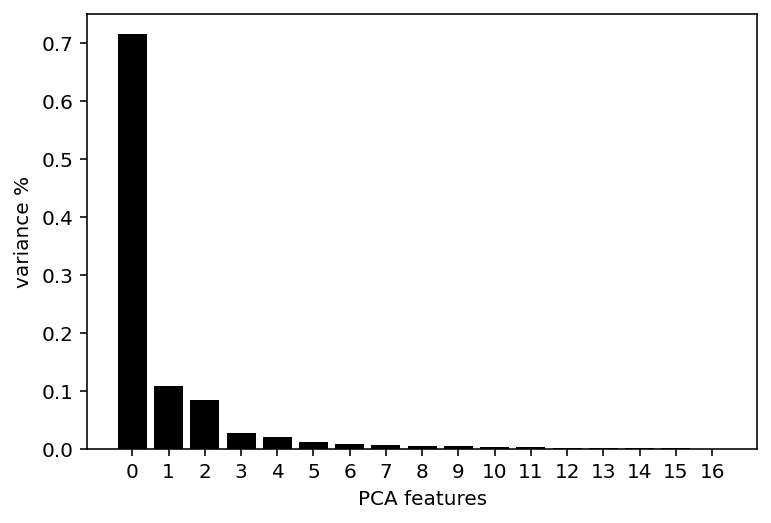

In [273]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

### Use two PCA features from previous step to be used in K means clustering

Text(0, 0.5, 'PCA 2')

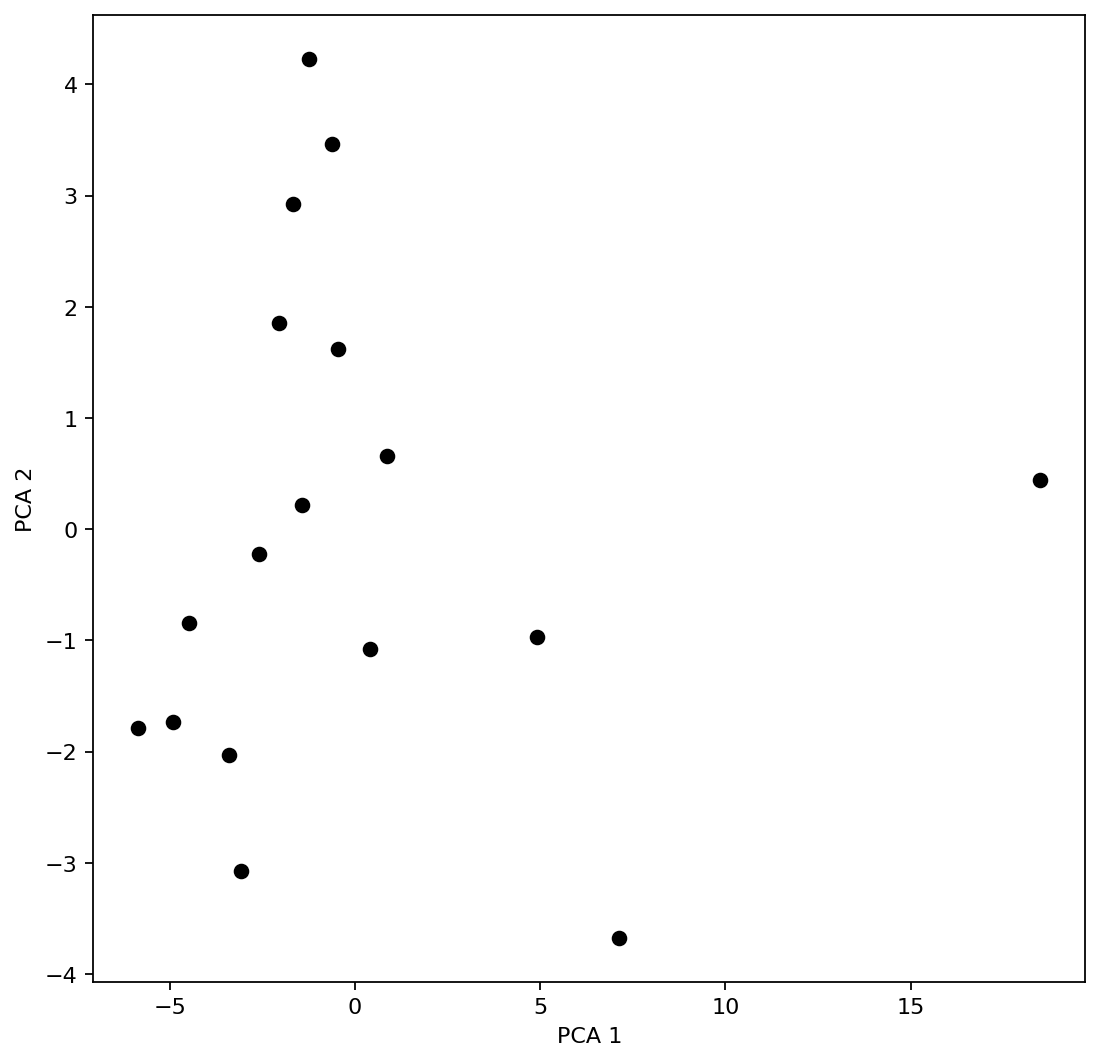

In [274]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(PCA_components[0], PCA_components[1], color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

### Use k=4 

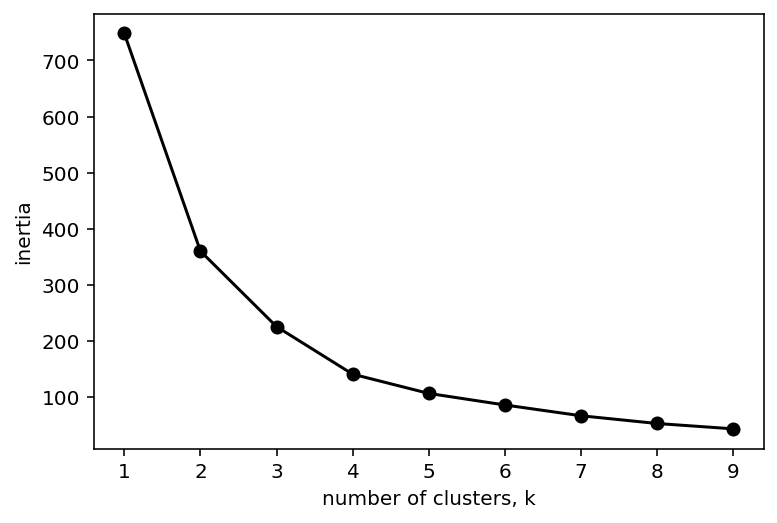

In [275]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(scaled_ootowers)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### Perform k means

In [277]:
model = KMeans(n_clusters = 4 )
model.fit(scaled_ootowers)
model.labels_

array([2, 2, 1, 0, 0, 3, 3, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0])

Text(0, 0.5, 'PCA 2')

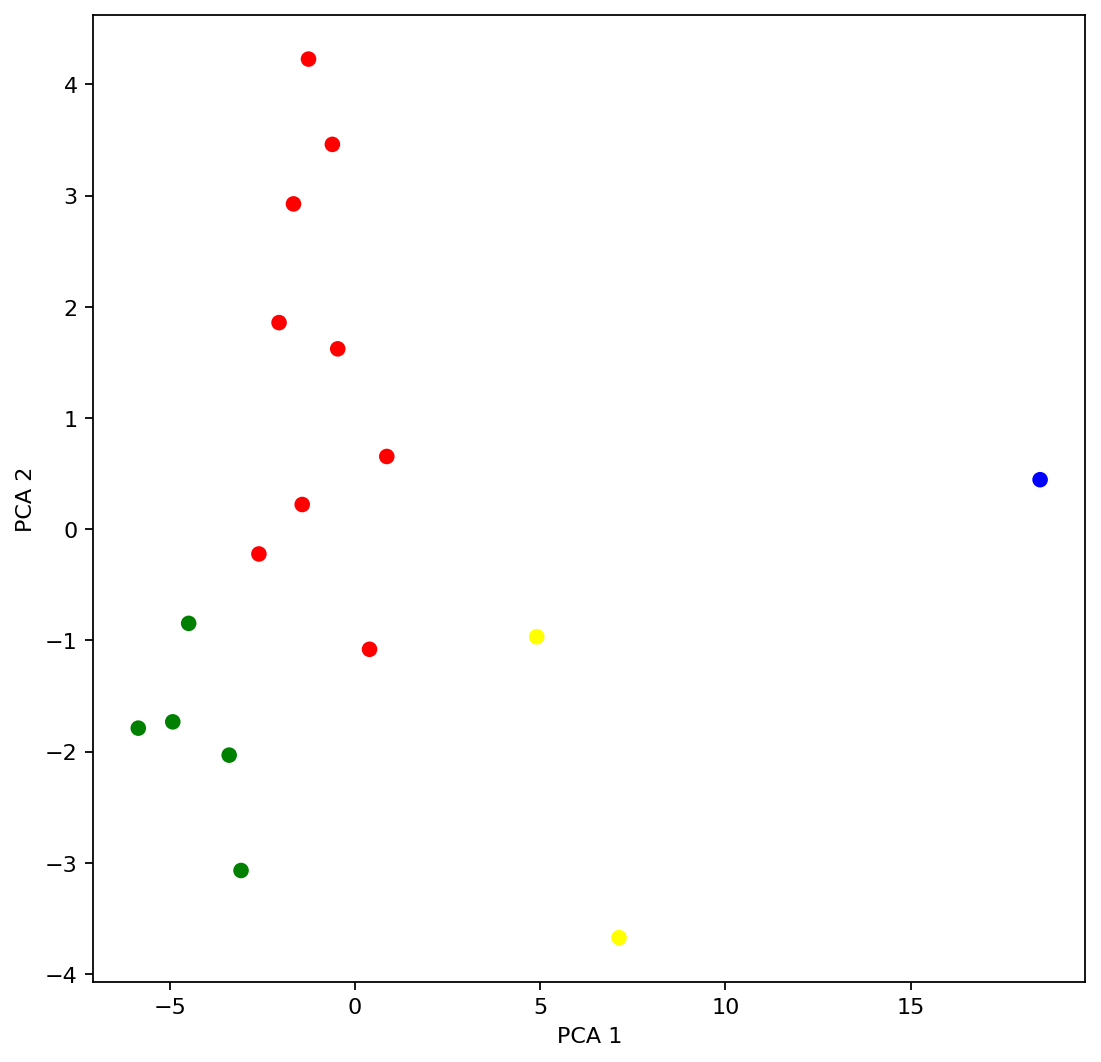

In [278]:
colormap = np.array(['Red', 'Blue', 'Green', 'Yellow'])
plt.figure(figsize=(8, 8), dpi=80)
z = plt.scatter(PCA_components[0], PCA_components[1], c = colormap[model.labels_])                                                                 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [282]:

df = pd.DataFrame(columns = ['Region', 'Class'])
df['Region'] = data.index
df['Class'] = model.labels_
df

ookla_t2019.replace({'Class': {0: "Decent", 1: "Fast", 2: "Slow", 3:"Good"}})

,Region,Class
0,ARMM,Slow
1,CAR,Slow
2,NCR,Fast
3,Region I,Decent
4,Region II,Decent
5,Region III,Good
6,Region IV-A,Good
7,Region IV-B,Decent
8,Region IX,Decent
9,Region V,Decent


In [ ]:
df.to_csv('ookla_tower_clustered')